In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [29]:
df=pd.read_csv('carsdekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [30]:
df.shape

(4340, 8)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [32]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [33]:
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64


In [34]:
df.replace({'fuel':{
    'Petrol':0.0,
    'Diesel':1.0,
    'CNG':2.0,
    'LPG':3.0,
    'Electric':4.0
    }},inplace=True)
df.replace({'seller_type':{
    'Dealer':0,
    'Individual':1,
    'Trustmark Dealer':2,
    }},inplace=True)
df.replace({'transmission':{
    'Manual':0,
    'Automatic':1
    }},inplace=True)
df.replace({'owner':{
    'First Owner':0,
    'Second Owner':1,
    'Third Owner':2,
    'Fourth & Above Owner':3,
    'Test Drive Car':4
    }},inplace=True)

In [35]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0.0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0.0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1.0,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0.0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1.0,1,0,1


In [36]:
x=df.drop(['name','selling_price'],axis=1)
y=df['selling_price']

In [37]:
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000   0.0            1             0      0
1     2007      50000   0.0            1             0      0
2     2012     100000   1.0            1             0      0
3     2017      46000   0.0            1             0      0
4     2014     141000   1.0            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000   1.0            1             0      1
4336  2014      80000   1.0            1             0      1
4337  2009      83000   0.0            1             0      1
4338  2016      90000   1.0            1             0      0
4339  2016      40000   0.0            1             0      0

[4340 rows x 6 columns]


In [38]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [40]:
lin_reg_model=LinearRegression()

In [41]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [42]:
training_data_prediction=lin_reg_model.predict(x_train)

In [44]:
error_score=metrics.r2_score(y_train,training_data_prediction)
print('R squared error:',error_score)

R squared error: 0.4276361285018685


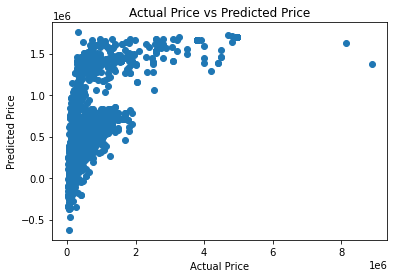

In [45]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [46]:
test_data_prediction=lin_reg_model.predict(x_test)

In [47]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print('R squared error:',error_score)

R squared error: 0.5027999353753423


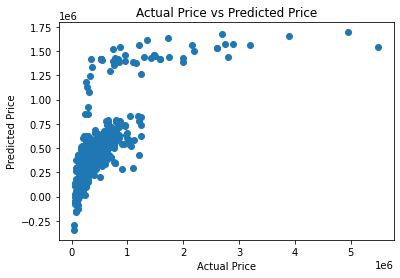

In [48]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [ ]:
##new predections
